## Smiling Face Classification

In [16]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers as tfl

import h5py

%matplotlib inline
np.random.seed(1)

In [17]:
# load data
train_dataset = h5py.File('data/train_happy.h5', "r")
X_train_orig = np.array(train_dataset["train_set_x"][:])
Y_train_orig = np.array(train_dataset["train_set_y"][:])

test_dataset = h5py.File('data/test_happy.h5', "r")
X_test_orig = np.array(test_dataset["test_set_x"][:])
Y_test_orig = np.array(test_dataset["test_set_y"][:])

classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
Y_train_orig = Y_train_orig.reshape((1, Y_train_orig.shape[0]))
Y_test_orig = Y_test_orig.reshape((1, Y_test_orig.shape[0]))

# normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# reshape target vectors
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

y = 0


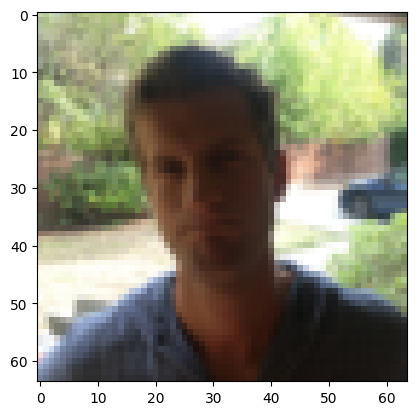

In [18]:
# show an example
index = 10
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train[index, :])))

In [19]:
# build model
model = tf.keras.Sequential([
    tfl.ZeroPadding2D(padding=3, input_shape=(64, 64, 3)),
    tfl.Conv2D(filters=32, kernel_size=7, strides=1),
    tfl.BatchNormalization(axis=3, momentum=0.99, epsilon=0.001),
    tfl.ReLU(),
    tfl.MaxPool2D(),
    tfl.Flatten(),
    tfl.Dense(1, activation='sigmoid')

])

In [20]:
# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# train model
model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10
38/38 [==============================] - 7s 115ms/step - loss: 1.1795 - accuracy: 0.7217
Epoch 2/10
38/38 [==============================] - 4s 113ms/step - loss: 0.2445 - accuracy: 0.9017
Epoch 3/10
38/38 [==============================] - 4s 115ms/step - loss: 0.1453 - accuracy: 0.9417
Epoch 4/10
38/38 [==============================] - 5s 123ms/step - loss: 0.0929 - accuracy: 0.9650
Epoch 5/10
38/38 [==============================] - 5s 122ms/step - loss: 0.0739 - accuracy: 0.9767
Epoch 6/10
38/38 [==============================] - 4s 116ms/step - loss: 0.0952 - accuracy: 0.9683
Epoch 7/10
38/38 [==============================] - 4s 116ms/step - loss: 0.1041 - accuracy: 0.9683
Epoch 8/10
38/38 [==============================] - 4s 118ms/step - loss: 0.0935 - accuracy: 0.9700
Epoch 9/10
38/38 [==============================] - 4s 110ms/step - loss: 0.0979 - accuracy: 0.9633
Epoch 10/10
38/38 [==============================] - 4s 114ms/step - loss: 0.1049 - accuracy: 0.9633

In [22]:
# evaluate model
model.evaluate(X_test, Y_test)

5/5 [==============================] - 1s 60ms/step - loss: 0.4374 - accuracy: 0.7933


[0.43737030029296875, 0.7933333516120911]